In [1]:
import glob
import gzip
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import stats
import sys

from Bio.Seq import Seq
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as offline
from plotly.subplots import make_subplots
import seaborn as sns

import matrix_transform
import visualize

%matplotlib inline
sns.set(font="Arial")
sns.set_theme(style="ticks")
colors = ['#D81B60', '#1E88E5', '#FFC107', '#31B547']
sns.set_palette(sns.color_palette(colors))

In [2]:
folder = 'Data/combined_raw_counts/'

In [3]:
empty = []
for residue in range(306):
    path_dir = folder + "res" + str(residue+1) + ".csv"
    test = pd.read_csv(path_dir)
    test['gc_mean'] = (test['gc1']+test['gc2'])/2
    test['glu_mean'] = (test['glu1']+test['glu2'])/2
    test['gal_mean'] = (test['gal1']+test['gal2'])/2
    test['grl_mean'] = (test['grl1']+test['grl2'])/2
    test = test.loc[test['glu1']!=test['glu1'].max()]
    corr_df = test.corr()
    empty.append([residue+1, corr_df['gal_mean'].loc['glu_mean'],
                  corr_df['gal_mean'].loc['grl_mean'],
                  corr_df['gal_mean'].loc['gc_mean'],
                  corr_df['glu_mean'].loc['gc_mean'],
                  corr_df['glu_mean'].loc['grl_mean'],
                  corr_df['gc_mean'].loc['grl_mean'],
                 ])

In [4]:
empty_df = pd.DataFrame(empty)
empty_df.columns = ['residue','gal:glu', 'gal:grl', 'gal:gc',
                   'glu:gc', 'glu:grl', 'gc:grl']

In [5]:
empty_df.to_csv('CSVs/correlations_per_res.csv')

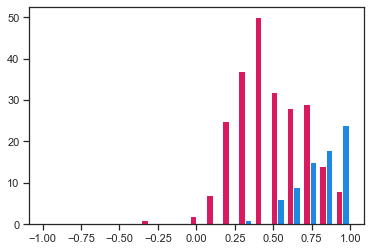

In [6]:
bins = np.linspace(-1, 1, 20)
plt.hist([empty_df['gal:glu'][0:140].append(empty_df['gal:glu'][149:242]),
         empty_df['gal:glu'][242:].append(empty_df['gal:glu'][140:149])],
         bins, label=['x', 'y'])
plt.show()

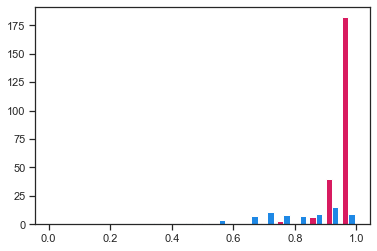

In [7]:
bins = np.linspace(0, 1, 20)
plt.hist([empty_df['gal:gc'][0:140].append(empty_df['gal:gc'][149:242]),
         empty_df['gal:gc'][242:].append(empty_df['gal:gc'][140:149])],
         bins, label=['x', 'y'])
plt.show()

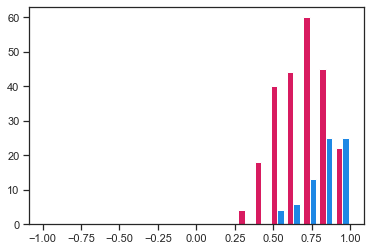

In [8]:
bins = np.linspace(-1, 1, 20)
plt.hist([empty_df['gal:grl'][0:140].append(empty_df['gal:grl'][149:242]),
         empty_df['gal:grl'][242:].append(empty_df['gal:grl'][140:149])],
         bins, label=['x', 'y'])
plt.show()

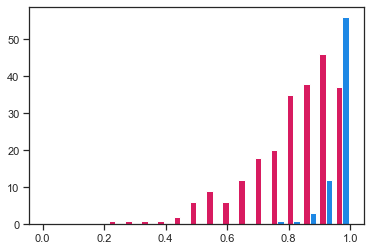

In [9]:
bins = np.linspace(0, 1, 20)
plt.hist([empty_df['glu:grl'][0:140].append(empty_df['glu:grl'][149:242]),
         empty_df['glu:grl'][242:].append(empty_df['glu:grl'][140:149])],
         bins, label=['x', 'y'])
plt.show()

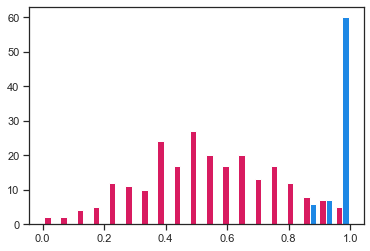

In [10]:
bins = np.linspace(0, 1, 20)
plt.hist([empty_df['glu:gc'][0:140].append(empty_df['glu:gc'][149:242]),
         empty_df['glu:gc'][242:].append(empty_df['glu:gc'][140:149])],
         bins, label=['x', 'y'])
plt.show()

### Percent wildtype

In [11]:
raw_count_folder = 'Data/combined_raw_count_foldchange/'
all_percentages = []
for x in range(1,307):
    file = 'res' + str(x) + '.csv'
    files = pd.read_csv(raw_count_folder+file, index_col = 0)
    percentages = []
    for col in ['glu1_counts', 'gal1_counts', 'gc1_counts', 'grl1_counts',
                'glu2_counts', 'gal2_counts', 'gc2_counts', 'grl2_counts']:
        percentages.append(files[col].max())
    all_percentages.append(percentages)

In [12]:
percentage_wt = pd.DataFrame(all_percentages)
percentage_wt.columns = ('glu1', 'gal1', 'gc1', 'grl1',
                         'glu2', 'gal2', 'gc2', 'grl2')

## Percent stop codon

In [28]:
raw_count_folder = 'Data/combined_raw_count_foldchange/'
cols = ['glu1_counts', 'gal1_counts', 'gc1_counts', 'grl1_counts',
                'glu2_counts', 'gal2_counts', 'gc2_counts', 'grl2_counts']
all_percentages = []
for x in range(1,307):
    file = 'res' + str(x) + '.csv'
    files = pd.read_csv(raw_count_folder+file, index_col = 0)
    stop_sum = files[files['site_2'].apply(lambda x: Seq(x).translate())=='*'][cols].sum()
    col_sum = files[cols].sum()
    all_percentages.append(list(stop_sum))

In [29]:
number_stop = pd.DataFrame(all_percentages)
number_stop.columns = ('glu1', 'gal1', 'gc1', 'grl1',
                         'glu2', 'gal2', 'gc2', 'grl2')

In [61]:
files[files['glu1_counts'] == files['glu1_counts'].max()]['glu1_counts']/\
files[files['glu1_counts'] == files['glu1_counts'].max()]['gal1_counts']

172    3.049436
dtype: float64

### No synonymous codings

In [ ]:
folder = 'Data/combined_raw_counts/'

In [ ]:
empty = []
for residue in range(306):
    path_dir = folder + "res" + str(residue+1) + ".csv"
    test = pd.read_csv(path_dir)
    test['gc_mean'] = (test['gc1']+test['gc2'])/2
    test['glu_mean'] = (test['glu1']+test['glu2'])/2
    test['gal_mean'] = (test['gal1']+test['gal2'])/2
    test['grl_mean'] = (test['grl1']+test['grl2'])/2
    test = test.loc[test['glu1']!=test['glu1'].max()]
    corr_df = test.corr()
    empty.append([residue+1, corr_df['gal_mean'].loc['glu_mean'],
                  corr_df['gal_mean'].loc['grl_mean'],
                  corr_df['gal_mean'].loc['gc_mean'],
                  corr_df['glu_mean'].loc['gc_mean'],
                  corr_df['glu_mean'].loc['grl_mean'],
                  corr_df['gc_mean'].loc['grl_mean'],
                 ])